In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves,radviz
import math as ma
import random
from scipy.stats import norm 

C:\Users\JUHI\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#data generated by adding random noise using exponential distribution to the data so that value looks original
def fun_noise1():
    arr=[]
    mu=75
    sigma=25/3
    lamda=0.5
    f24=np.random.normal(75,25/3)
    fx=f24
    #f(24)=N(75, (25/3)^(/2) )
    #using fx with reverse loop
    for i in range(0,8):
        d=np.random.uniform(50,60)
        ef=lamda*ma.exp(-i*lamda)  
        rn=np.random.normal(0,fx**0.25)
        #F(X) = Min(FGS, FGS - E^(-1/2) - RN)
        fx=min(d-ef,d-ef-rn)
        arr.append(fx)
    return arr        
data1=fun_noise1()

In [3]:
#df1 has data for 10am to 5pm (dustbin will fill very less)
df1 = pd.DataFrame(data1,columns=['1'])
df1=df1.sort_values(by=['1'],ascending=[True])
#df1 = df1.reset_index(drop=True)
#df1.index=['10','11','12','13','14','15','16','17']

In [4]:
#data generated by adding random noise using exponential distribution to the data so that value looks original
def fun_noise2():
    arr=[]
    mu=75
    sigma=25/3
    lamda=0.5
    f24=np.random.normal(75,25/3)
    fx=f24
    #f(24)=N(75, (25/3)^(/2) )
    #using fx with reverse loop
    for i in range(0,3):
        d=np.random.uniform(5,50)
        ef=lamda*ma.exp(-i*lamda)  
        rn=np.random.normal(0,fx**0.25)
        #F(X) = Min(FGS, FGS - E^(-1/2) - RN)
        fx=min(d-ef,d-ef-rn)
        arr.append(fx)
    return arr        
data2=fun_noise2()

In [5]:
#df2 has data from 7am to 9am (dustbin will fill with great speed)
df2 = pd.DataFrame(data2,columns=['1'])
df2=df2.sort_values(by=['1'],ascending=[True])
#df2 = df2.reset_index(drop=True)
#df2.index=['7','8','9']

In [6]:
#data generated by adding random noise using exponential distribution to the data so that value looks original
def fun_noise3():
    arr=[]
    mu=75
    sigma=25/3
    lamda=0.5
    f24=np.random.normal(75,25/3)
    fx=f24
    #f(24)=N(75, (25/3)^(/2) )
    #using fx with reverse loop
    for i in range(0,3):
        d=np.random.uniform(61,96)
        ef=lamda*ma.exp(-i*lamda)  
        rn=np.random.normal(0,fx**0.25)
        #F(X) = Min(FGS, FGS - E^(-1/2) - RN)
        fx=min(d-ef,d-ef-rn)
        arr.append(fx)
    return arr        
data3=fun_noise3()

In [7]:
#df3 has data from 6pm tp 8pm (dustbin will fill with great speed)
df3 = pd.DataFrame(data3,columns=['1'])
df3=df3.sort_values(by=['1'],ascending=[True])
#df3 = df3.reset_index(drop=True)
#df3.index=['18','19','20']


In [8]:
#data generated by adding random noise using exponential distribution to the data so that value looks original
def fun_noise4():
    arr=[]
    mu=75
    sigma=25/3
    lamda=0.5
    f24=np.random.normal(75,25/3)
    fx=f24
    #f(24)=N(75, (25/3)^(/2) )
    #using fx with reverse loop
    for i in range(0,10):
        d=np.random.uniform(95,100)
        ef=lamda*ma.exp(-i*lamda)  
        rn=np.random.normal(0,fx**0.25)
        #F(X) = Min(FGS, FGS - E^(-1/2) - RN)
        fx=max(d-ef,d-ef-rn)
        arr.append(fx)
    return arr        
data4=fun_noise4()

In [9]:
#df4 has data from 9pm to 6am (dustbin will not fill at all therfore same constant height )
df4 = pd.DataFrame(data4,columns=['1'])

In [10]:
#concatenating all dataframes to make one dataframe
#converting all decimal to integer
frames=[df2,df1,df3,df4]
df=pd.concat(frames)
df['1']=df['1'].astype(int)
time=['7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','1','2','3','4','5','6']
df.insert(loc=0, column='hours', value=time)


In [11]:
df= df.reset_index(drop=True)
df

,hours,1
0,7,7
1,8,17
2,9,25
3,10,48
4,11,53
5,12,54
6,13,55
7,14,55
8,15,55
9,16,56


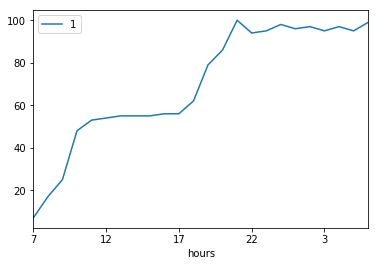

In [12]:
#plotting day1
df.plot(x='hours',y='1')
labels=['7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','1','2','3','4','5','6']
#plt.xticks(df.hours,labels)

plt.show()

In [14]:
#creating a dataframe for 80 days
for i in range(2,80):
    d1=fun_noise1()
    d2=fun_noise2()
    d3=fun_noise3()
    d4=fun_noise4()
    dfn=pd.DataFrame()
    df1 = pd.DataFrame(d1,columns=[i])
    df1=df1.sort_values(by=i,ascending=[True])
    df2 = pd.DataFrame(d2,columns=[i])
    df2=df2.sort_values(by=i,ascending=[True])
    df3 = pd.DataFrame(d3,columns=[i])
    df3=df3.sort_values(by=i,ascending=[True])
    df4 = pd.DataFrame(d4,columns=[i])
    frames=[df2,df1,df3,df4]
    dfn=pd.concat(frames)
    #print(dfn.shape)
    dfn=dfn[i].astype(int)
    dfn= dfn.reset_index(drop=True)
    df=pd.concat([df,dfn],axis=1)
    #print(df.shape)

In [15]:

#columns contains different days and row contains hours
df.shape

(24, 89)

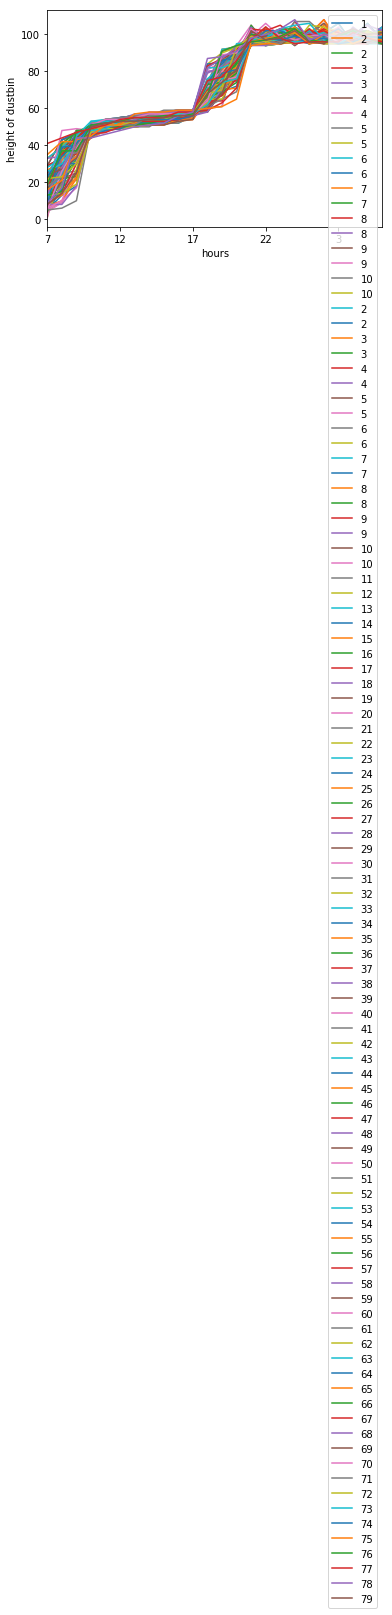

In [16]:
#plotting all the data generated
colall=[]
for col in df:
    if col!='hours':
        colall.append(col)
ax=df.plot(x='hours',y=colall,kind='line')
ax.set_ylabel("height of dustbin")
ax.set_xlabel("hours")
plt.show()

In [18]:
writer = pd.ExcelWriter('garbage_data.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()